In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
#显式Euler,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点
def euler(f,h,x0,y0,x):
    xx=np.arange(x0,x+h,h)
    y=[y0]
    for i in range(len(xx)-1):
        yi=y[i]+h*f(xx[i],y[i])
        y.append(yi)
    return y
#改进Euler,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点
def ieuler(f,h,x0,y0,x):
    xx=np.arange(x0,x+h,h)
    y=[y0]
    for i in range(len(xx)-1):
        yi=y[i]+h/2*(f(xx[i],y[i])+f(xx[i+1],y[i]+h*f(xx[i],y[i])))
        y.append(yi)
    return y
#三级三阶R-K方法,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点
def RK3(f,h,x0,y0,x):
    xx=np.arange(x0,x+h,h)
    y=[y0]
    for i in range(len(xx)-1):
        k1=f(xx[i],y[i])
        k2=f(xx[i]+0.5*h,y[i]+0.5*h*k1)
        k3=f(xx[i]+h,y[i]-h*k1+2*h*k2)
        yi=y[i]+(h/6)*(k1+4*k2+k3)
        y.append(yi)
    return y
#四级四阶R-K方法,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点
def RK4(f,h,x0,y0,x):
    xx=np.arange(x0,x+h,h)
    y=[y0]
    for i in range(len(xx)-1):
        k1=f(xx[i],y[i])
        k2=f(xx[i]+0.5*h,y[i]+0.5*h*k1)
        k3=f(xx[i]+0.5*h,y[i]+0.5*h*k2)
        k4=f(xx[i]+h,y[i]+h*k3)
        yi=y[i]+(h/6)*(k1+2*k2+2*k3+k4)
        y.append(yi)
    return y
#显式Euler,f为du/dt，h为步长，x0,y0为t,u初值向量，x为t终值点（多元）
def eulervector(F,h, t0, y0, x):
    xx=np.arange(t0,x+h,h)
    t = t0
    y = y0
    u=[y0[0]]
    for i in range(len(xx)-1):
        y= y + h*F(t,y)
        t = t + h
        u.append(y[0])
    return u
# 改进Euler,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点（多元）
def ieulervector(F,h, t0, y0, x):
    xx=np.arange(t0,x+h,h)
    t = t0
    y = y0
    u=[y0[0]]
    for i in range(len(xx)-1):
        y1= y + h*F(t,y)
        y=y+h/2*(F(t,y1)+F(t,y))
        t = t + h
        u.append(y[0])
    return u
#三级三阶R-K方法,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点（多元）
def RK3vector(F,h, t0, y0, x):
    xx=np.arange(t0,x+h,h)
    t = t0
    y = y0
    u=[y0[0]]
    for i in range(len(xx)-1):
        k1 =  F(t, y)
        k2 =  F(t + h/2, y + h*k1/2)
        k3 =  F(t + h, y-h*k1+2*h*k2)
        y = y + (k1 + 4*k2 +k3)*h / 6
        t = t + h
        u.append(y[0])
    return u
#四级四阶R-K方法,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点（多元）
def RK4vector(F,h, t0, y0, x):
    xx=np.arange(t0,x+h,h)
    t = t0
    y = y0
    u=[y0[0]]
    for i in range(len(xx)-1):
        k1 =  F(t, y)
        k2 =  F(t + h/2, y + h*k1/2)
        k3 =  F(t + h/2, y+0.5*h*k2)
        k4=F(t+h,y+h*k3)
        y = y + (k1 + 2*k2 +2*k3+k4)*h / 6
        t = t + h
        u.append(y[0])
    return u

In [2]:
#三阶Adama内插法
def Adamsiner3(f,h,x0,y0,y1,y2,x):
    xx=np.arange(x0,x+h,h)
    y=[y0,y1,y2]
    for i in range(len(xx)-3):
        yy=y[i+2]+(h/12)*(23*f(xx[i+2],y[i+2])-16*f(xx[i+1],y[i+1])+5*f(xx[i],y[i]))
        yi=y[i+2]+(h/12)*(5*f(xx[i+2]+h,yy)+8*f(xx[i+2],y[i+2])-f(xx[i+1],y[i+1]))
        y.append(yi)
    return y
#四阶Adama外插法
def Adamsexter4(f,h,x0,y0,y1,y2,y3,x):
    xx=np.arange(x0,x+h,h)
    y=[y0,y1,y2,y3]
    for i in range(len(xx)-4):
        yi=y[i+3]+(h/24)*(55*f(xx[i+3],y[i+3])-59*f(xx[i+2],y[i+2])+37*f(xx[i+1],y[i+1])-9*f(xx[i],y[i]))
        y.append(yi)
    return y 

In [9]:
f=lambda x,y:-5*y
x0=0
y0=1
x=1
h=0.1
t=np.arange(0,1+h,h)
u=[math.e**(-5*i) for i in t]
y1=RK3(f,h,x0,y0,x)[1]
y2=RK3(f,h,x0,y0,x)[2]
ad3=Adamsiner3(f,h,x0,y0,y1,y2,x)
errorad3=[]
for i in range(len(u)):
    e=abs(u[i]-ad3[i])
    errorad3.append(e)
print(errorad3[-1])
xeu=euler(f,h,x0,y0,x)
erroreuler=[]
for i in range(len(u)):
    e=abs(u[i]-xeu[i])
    erroreuler.append(e)
erroreuler[-1]

0.0007375587546764846


np.float64(0.005761384499085469)

In [11]:
h=0.05
t=np.arange(0,1+h,h)
u=[math.e**(-5*i) for i in t]
y1=RK3(f,h,x0,y0,x)[1]
y2=RK3(f,h,x0,y0,x)[2]
ad33=Adamsiner3(f,h,x0,y0,y1,y2,x)
errorad33=[]
for i in range(len(u)):
    e=abs(u[i]-ad33[i])
    errorad33.append(e)
print(errorad33[-1])
xeu=euler(f,h,x0,y0,x)
erroreuler=[]
for i in range(len(u)):
    e=abs(u[i]-xeu[i])
    erroreuler.append(e)
erroreuler[-1]

4.869088743136851e-05


np.float64(0.0035667350601514755)

In [12]:
f=lambda x,y:-5*y
x0=0
y0=1
x=1
h=0.1
t=np.arange(0,1+h,h)
u=[math.e**(-5*i) for i in t]
y1=euler(f,h,x0,y0,x)[1]
y2=euler(f,h,x0,y0,x)[2]
y3=euler(f,h,x0,y0,x)[3]
ad4=Adamsexter4(f,h,x0,y0,y1,y2,y3,x)
errorad4=[]
for i in range(len(ad4)):
    e=abs(u[i]-ad4[i])
    errorad4.append(e)
print(errorad4[-1])
xeu=euler(f,h,x0,y0,x)
erroreuler=[]
for i in range(len(xeu)):
    e=abs(u[i]-xeu[i])
    erroreuler.append(e)
erroreuler[-1]

0.08215173732696371


np.float64(0.005761384499085469)

In [13]:
f=lambda x,y:-5*y
x0=0
y0=1
x=1
h=0.05
t=np.arange(0,1+h,h)
u=[math.e**(-5*i) for i in t]
y1=euler(f,h,x0,y0,x)[1]
y2=euler(f,h,x0,y0,x)[2]
y3=euler(f,h,x0,y0,x)[3]
ad44=Adamsexter4(f,h,x0,y0,y1,y2,y3,x)
errorad44=[]
for i in range(len(ad44)):
    e=abs(u[i]-ad44[i])
    errorad44.append(e)
print(errorad44[-1])
xeu=euler(f,h,x0,y0,x)
erroreuler=[]
for i in range(len(xeu)):
    e=abs(u[i]-xeu[i])
    erroreuler.append(e)
erroreuler[-1]

0.00030399342776890777


np.float64(0.0035667350601514755)

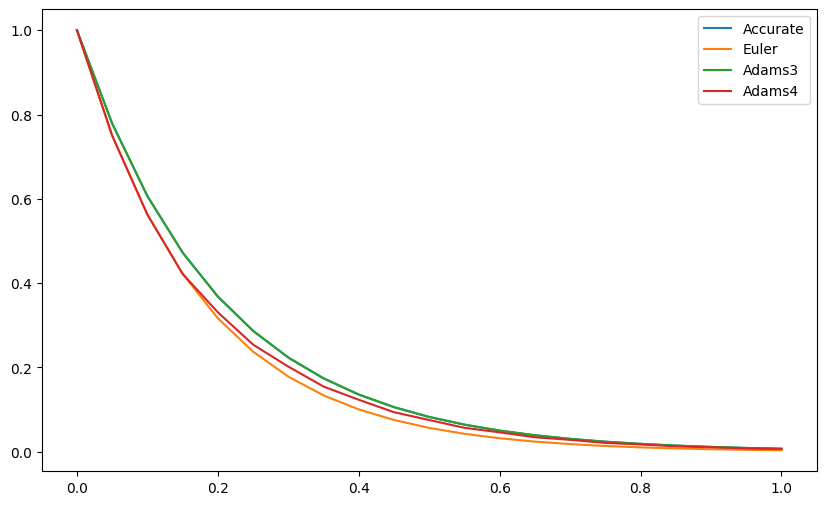

In [37]:
plt.figure(figsize=(10,6))
plt.plot(t,u,label='Accurate')
plt.plot(t,xeu,label='Euler')
plt.plot(t,ad33,label='Adams3')
plt.plot(t,ad44,label='Adams4')
plt.legend()

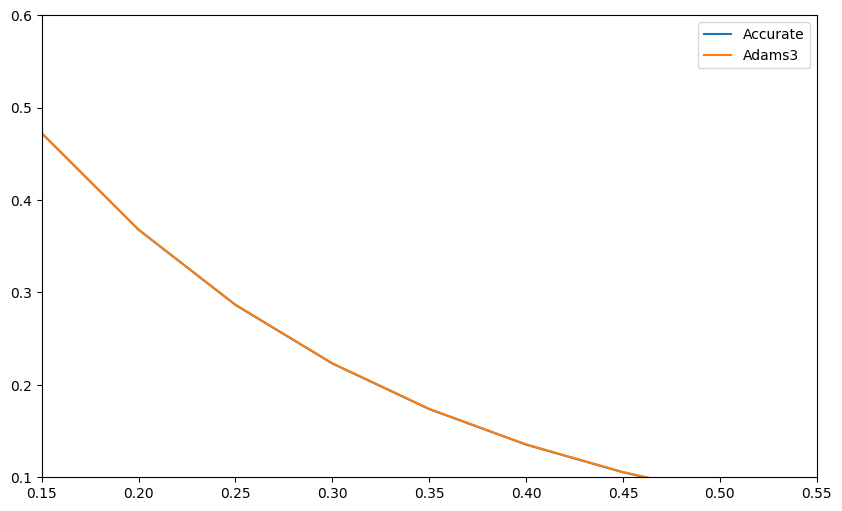

In [43]:
plt.figure(figsize=(10,6))
plt.plot(t,u,label='Accurate')
# plt.plot(t,xeu,label='Euler')
plt.plot(t,ad33,label='Adams3')
# plt.plot(t,ad44,label='Adams4')
plt.gca().set_xlim(0.15,0.55) 
plt.gca().set_ylim(0.1, 0.6)
plt.legend()

In [91]:
f=lambda x,y:-5*y
x0=0
y0=1
x=1
h=0.025
t=np.arange(0,1+h,h)
u=[math.e**(-5*i) for i in t]
y1=RK3(f,h,x0,y0,x)[1]
y2=RK3(f,h,x0,y0,x)[2]
ad3=Adamsiner3(f,h,x0,y0,y1,y2,x)
errorad333=[]
for i in range(len(u)):
    e=abs(u[i]-ad3[i])
    errorad333.append(e)
print(errorad333[-1])
y1=euler(f,h,x0,y0,x)[1]
y2=euler(f,h,x0,y0,x)[2]
y3=euler(f,h,x0,y0,x)[3]
ad44=Adamsexter4(f,h,x0,y0,y1,y2,y3,x)
errorad444=[]
for i in range(len(ad44)):
    e=abs(u[i]-ad44[i])
    errorad444.append(e)
print(errorad444[-1])

4.2018079929326616e-06
0.0001662014294769457


the p of absolute error is 3.7278019662825326
the p of relative error is 4.474607242238548


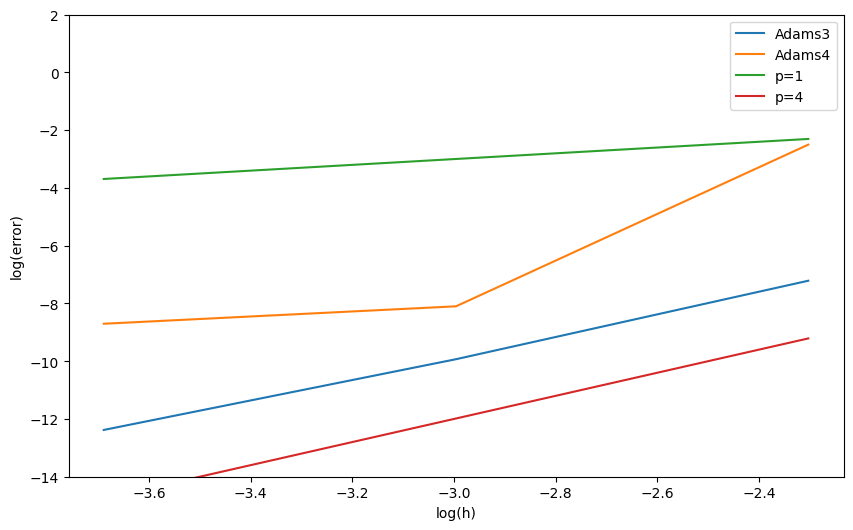

In [92]:
H=[0.1,0.05,0.025]
lgh=[math.log(i) for i in H]
lgh2=[2*i for i in lgh]
lgh3=[3*i for i in lgh]
lgh4=[4*i for i in lgh]
lgh5=[1*i for i in lgh]
ead3=[errorad3[-1],errorad33[-1],errorad333[-1]]
ead4=[errorad4[-1],errorad44[-1],errorad444[-1]]
lgerrorad3=[math.log(i) for i in ead3]
lgerrorad4=[math.log(i) for i in ead4]
plt.figure(figsize=(10,6))
plt.plot(lgh,lgerrorad3,label='Adams3')
plt.plot(lgh,lgerrorad4,label='Adams4')
plt.plot(lgh,lgh,label='p=1')
plt.plot(lgh,lgh4,label='p=4')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
# plt.gca().set_xlim(0.15,0.55) 
plt.gca().set_ylim(-14, 2)
# plt.title('Euler')
plt.legend()
ap1=math.log(ead3[1]/ead3[0])/math.log(0.5)
ap2=math.log(ead3[2]/ead3[1])/math.log(0.5)
# ap3=math.log(ead3[3]/ead3[2])/math.log(0.5)
ap=(ap1+ap2)/2
rp1=math.log(ead4[1]/ead4[0])/math.log(0.5)
rp2=math.log(ead4[2]/ead4[1])/math.log(0.5)
# rp3=math.log(ead4[3]/ead4[2])/math.log(0.5)
rp=(rp1+rp2)/2
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))